A Base de dados a ser analisada foi feita pela Fundação Abrinq para listar o número de matrículas na pré-escola em cada município brasileiro enbtre os anos de 2010 e 2019, podendo impactar nos níveis de alfabetização e índices de educação em tais municípios.
Disponível em : https://basedosdados.org/dataset/br-abrinq-oca?bdm_table=municipio_primeira_infancia

In [2]:
%%bash 
pip3 -q install basedosdados
pip3 -q install geopandas
pip3 -q install geobr


Abaixo são importadas aas bibliotecas e é montada a base no drive

In [3]:
#---------------------------------------------------------------------------------------------------------------------------------------------#
#Importar bibliotecas
import geopandas as gpd
import geobr 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression #Regressão linear
from sklearn import metrics #Cálculo do erro
%matplotlib inline 
from PIL import Image #imagens
import urllib.request as urllib2 #download de arquivos
from google.colab import drive
#---------------------------------------------------------------------------------------------------------------------------------------------#
drive.mount('/drive') #monta a base no google drive
!ls '/drive/MyDrive/Tópicos especiais de informática/Base de dados/municipio_primeira_infancia.csv' #verifica onde a base está montada no drive
#---------------------------------------------------------------------------------------------------------------------------------------------#

Mounted at /drive
'/drive/MyDrive/Tópicos especiais de informática/Base de dados/municipio_primeira_infancia.csv'


Abaixo são definidas as variáveis de uso global

In [4]:
#---------------------------------------------------------------------------------------------------------------------------------------------#

#Define a regressão linear, as variáveis, os dataframes e as listas globais

rl = LinearRegression() #Regresão linear
df_nomes = geobr.read_municipality() #Dataframe com os municípios e estados com seus códigos do IBGE
df = pd.read_csv('/drive/MyDrive/Tópicos especiais de informática/Base de dados/municipio_primeira_infancia.csv') #Dataframe principal
df = df.fillna(0) #Substitui valores Not a Number por zeros para não dar conflito de tipos
anos=df['ano'] #Dataframe com os anos
df_municipio = df_nomes #Dataframe com os nomes dos municípios
listaabrev = df_nomes['abbrev_state'].unique().tolist() #Lista com as abreviações dos estados
listamuni = df['id_municipio'].unique().tolist() #Lista com os códigos dos municípios
listanomemuni = df_nomes['name_muni'].unique().tolist() # Lista com os nomes dos municípios
df_munic = df #Dataframe auxiliar 

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


Abaixo é realizado o cálculo do número de matrículas absoluto de um município especificado pelo usuário.

Digite a abreviação do estado: MT
Digite o nome do municipio: Cuiabá

No município de  Cuiabá ( MT ), o número de matrículas em  2010  eram  8406 , já em  2019  são  15901 , ou seja,
houve aumento de 7495 matrículas
Gráfico abaixo


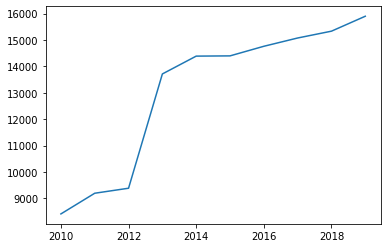

In [5]:
#---------------------------------------------------------------------------------------------------------------------------------------------#

#Calcula alteração no número de matrículas por município individual

estado = input('Digite a abreviação do estado: ') #Input para definir o estado
municipio = input('Digite o nome do municipio: ') #Input para definir o municipio
if (estado == '') or (municipio == ''): #If para validar a entrada de dados do estado e do municipio
  print('Faltou escrever alguma coisa')
elif (estado not in listaabrev) or (municipio not in listanomemuni): #If para validar se os dados condizem com as listas
  print('Estado ou Município não reconhecido, digite novamente')
else:
  for i in range(0,len(listaabrev)):                                    #
    if (estado == listaabrev[i]):                                       # 
      df_estado = df_nomes[df_nomes['abbrev_state']==estado]            #
      for i in range(0,len(listanomemuni)):                             #  Aqui se define o município a ser usado a partir do que o usuário forneceu
        if (municipio == listanomemuni[i]):                             #
          df_municipio = df_estado[df_estado['name_muni']==municipio]   #
          codigomunicipio = int(df_municipio['code_muni'])              #

          
  df_munic=df[df['id_municipio']==codigomunicipio] #Estabelece os dados a serem usados no datraframe auxiliar

  anominimo = df_munic['ano'].min() #Define-se o ano de término das medições, o maior ano registrado
  anomaximo = df_munic['ano'].max() # Define-se o ano de início das medições, o menor ano registrado

  plt.plot(df_munic['ano'],df_munic['numero_absoluto_liquido_matricula_pre_escola']) #imprime o gráfico

  varum = int(df_munic[df_munic['ano']==anominimo]['numero_absoluto_liquido_matricula_pre_escola']) #numero de matriculas no menor ano

  vardois = int(df_munic[df_munic['ano']==anomaximo]['numero_absoluto_liquido_matricula_pre_escola']) #numero de matriculas no maior ano
  
  df_municipio = df_nomes #retorna o dataframe para seu formato original

  print('')
  print('No município de ',municipio,'(',estado,'), o número de matrículas em ',anominimo,' eram ',varum,', já em ',anomaximo,' são ',vardois,', ou seja,') #Imprime o município, o estado onde fica e as coclusões tiradas

  result = varum-vardois #calculo da diferenca

  if result>0: #se result for positivo, houve diminuição

    print('houve diminuição de',result,'matrículas')

  elif result==0: #se for igual a zero, não houve alteração

    print('o número de matrículas não se alterou')

  else: #senão, houve aumento de matrículas

    print('houve aumento de',result*-1,'matrículas')

  print("Gráfico abaixo")

Abaixo é feito o cálculo do número de matrículas absoluto de um município selecionado aleatoriamente pelo código.


No município de  Governador Jorge Teixeira ( RO ), o número de matrículas em  2010  eram  84 , já em  2019  são  145 , ou seja,
houve aumento de 61 matrículas
Gráfico abaixo


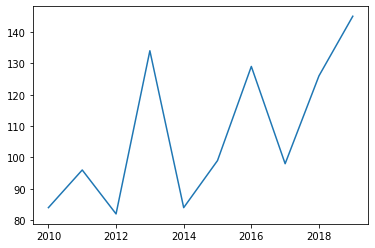

In [6]:
#---------------------------------------------------------------------------------------------------------------------------------------------#

#calcula alteração no número de matrículas de um município aleatório

idaleatorio = int(listamuni[random.randint(0,5570)])
df_munic = df[df['id_municipio']==idaleatorio] 

municipionome = df_municipio[df_municipio['code_muni']==idaleatorio].iloc[0]
estadonome = df_municipio[df_municipio['code_muni']==idaleatorio].iloc[0]

municipio = str(municipionome['name_muni'])
estado = str(estadonome['abbrev_state'])

plt.plot(df_munic['ano'],df_munic['numero_absoluto_liquido_matricula_pre_escola']) #imprime o gráfico

varum = int(df_munic[df_munic['ano']==anominimo]['numero_absoluto_liquido_matricula_pre_escola']) #numero de matriculas no menor ano

vardois = int(df_munic[df_munic['ano']==anomaximo]['numero_absoluto_liquido_matricula_pre_escola']) #numero de matriculas no maior ano

print('')
print('No município de ',municipio,'(',estado,'), o número de matrículas em ',anominimo,' eram ',varum,', já em ',anomaximo,' são ',vardois,', ou seja,') #Imprime o município, o estado onde fica e as coclusões tiradas

result = varum-vardois #calculo da diferenca

if result>0: #se result for positivo, houve diminuição

  print('houve diminuição de',result,'matrículas')

elif result==0: #se for igual a zero, não houve alteração

  print('o número de matrículas não se alterou')

else: #senão, houve aumento de matrículas

  print('houve aumento de',result*-1,'matrículas')

print("Gráfico abaixo")

Abaixo são calculadas as matrículas de todos os municípios brasileiros, mostrando a quantia de municípios em que houve aumento de matrículas, diminuição de matrículas ou em que não ocorreu alteração nos números, todos em relação a 2010. Também são calculadas as médias desses resultados.

Quantidade de municípios em que houve diminuição de matrículas:  777
Média aproximada de municípios em que houve diminuição de matrículas:  13.95 %
Quantidade de municípios em que o número de matrículas não se alterou:  29
Média aproximada de municípios em que o número de matrículas não se alterou:  0.52 %
Quantidade de municípios em que houve aumento de matrículas:  4764
Média aproximada de municípios em que houve aumento de matrículas:  85.53 %
Gráfico abaixo


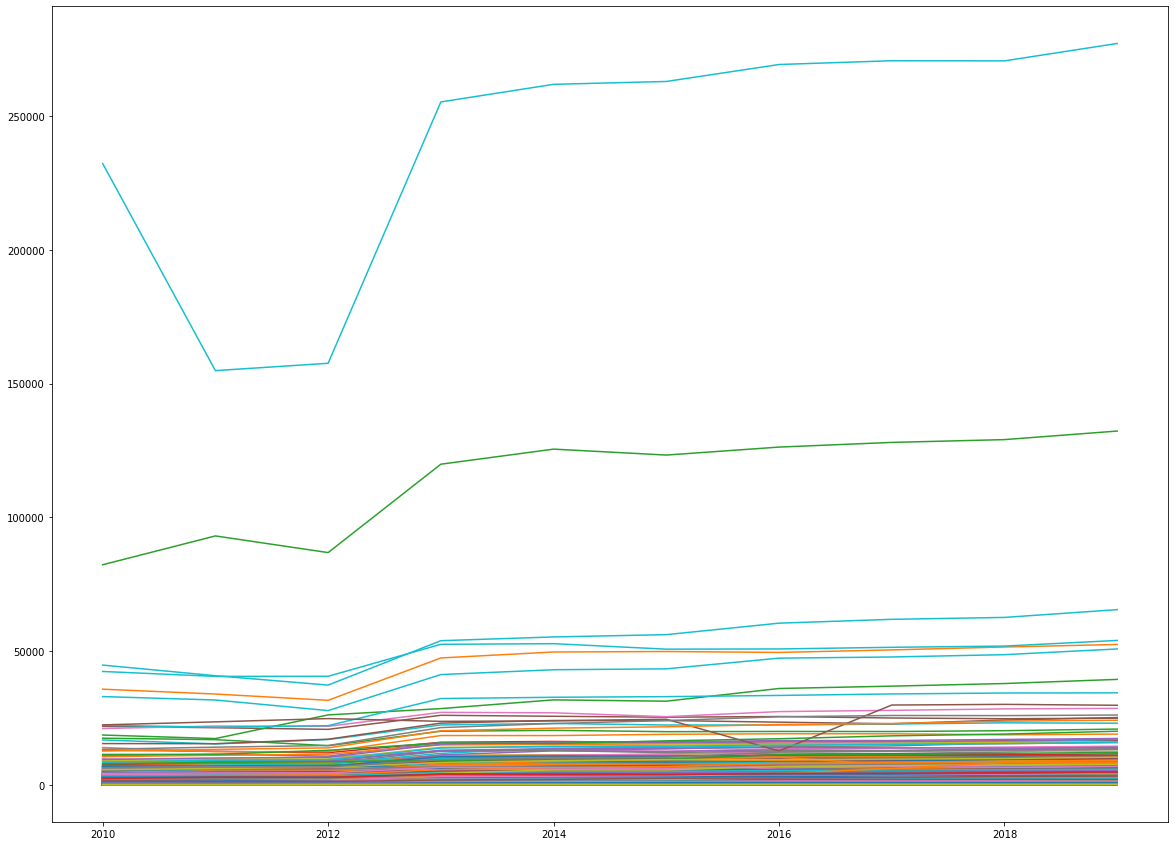

In [7]:
#---------------------------------------------------------------------------------------------------------------------------------------------#

#contadores
contum = 0
contdois = 0
conttres = 0

#medias
mediaum = 0
mediadois = 0
mediatres = 0

fig=plt.figure(figsize=(20,15))

#calcula a quantia de municípios para cada alteração no número de matrículas

for i in range (0,len(listamuni)): 

  df_munic=df[df['id_municipio']==listamuni[i]] #pega cada município da lista

  plt.plot(df_munic['ano'],df_munic['numero_absoluto_liquido_matricula_pre_escola']) #impriem seu gráfico

  anominimo = df_munic['ano'].min() #pega o ano de início 

  anomaximo = df_munic['ano'].max() #pega o ano de fim

  varum = int(df_munic[df_munic['ano']==anominimo]['numero_absoluto_liquido_matricula_pre_escola']) #variavel um é igual ao numero de matriculas no ano de inicio

  vardois = int(df_munic[df_munic['ano']==anomaximo]['numero_absoluto_liquido_matricula_pre_escola']) #variavel dois é igual ao numero de matriculas no ano de fim

  result = varum-vardois #resultado/diferença

  if result>0: #se positivo, contador um recebe 1

    contum+=1

  elif result==0:  #se for zero, contador dois recebe 1

    contdois+=1

  else: #senão, contador três recebe 1

    conttres+=1

mediaum = (contum*100)/5570 #media de municipios em que houve diminuição de matriculas
mediadois = (contdois*100)/5570 #media de municipios em que não houve alteração nas matriculas
mediatres = (conttres*100)/5570 #media de municipios em que houve aumento de matriculas

print("Quantidade de municípios em que houve diminuição de matrículas: ",contum) 
print("Média aproximada de municípios em que houve diminuição de matrículas: ",round(mediaum,2),"%")
print("Quantidade de municípios em que o número de matrículas não se alterou: ",contdois)
print("Média aproximada de municípios em que o número de matrículas não se alterou: ",round(mediadois,2),"%")
print("Quantidade de municípios em que houve aumento de matrículas: ",conttres)
print("Média aproximada de municípios em que houve aumento de matrículas: ",round(mediatres,2),"%")
print("Gráfico abaixo")

Abaixo é realizada uma predição do número de matrículas para um município específico.
O usuário especifica o município, o ano de previsão e o estilo do gráfico (se terá somente a linha, somente o ponto ou se terá os dois juntos).

Digite a abreviação do estado: PR
Digite o nome do municipio: Cascavel
Digite o ano para previsão:2025
Digite o que mostrar no gráfico (1-somente linha de previsão/2-somente ponto de previsão/3-linha e ponto): 1
Digite algo
Ano:  [2010 2025]
Número de matrículas:  [4263.30909091 8378.94545455]
Predição de matrículas no ano de  2025  para o município de  Cascavel ( PR )



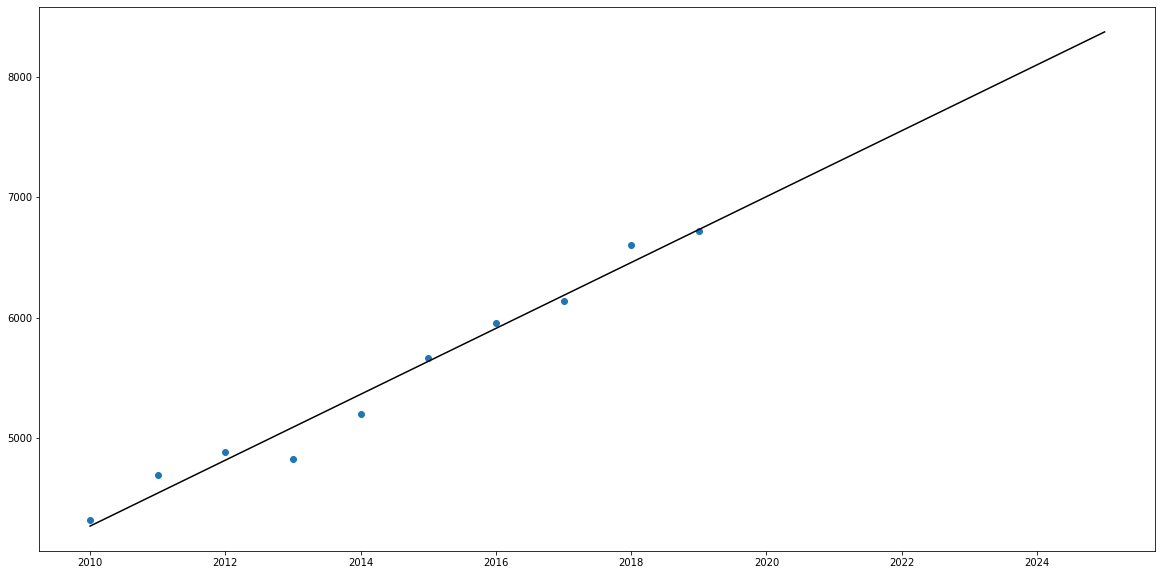

In [9]:
#prediz o número absoluto de matrículas por município em função do ano

estado = input("Digite a abreviação do estado: ") #Input para a abreviação do estado
municipio = input("Digite o nome do municipio: ") #Input para o nome do município
anoprev = input("Digite o ano para previsão:")
mostrar = input("Digite o que mostrar no gráfico (1-somente linha de previsão/2-somente ponto de previsão/3-linha e ponto): ") #Pede para o usuário se ele quer que a linha de regressão seja mostrada

codigomunicipio = 0 #Reseta o código do município

if (estado=="")or(municipio=="")or(anoprev=="")or(mostrar==""): #verifica as entradas
  print("Digite algo")
else:

  ano = int(anoprev) # converte para inteiro
  mostra = int(mostrar) # converte para inteiro

  if (ano < 2020): #Verifica se o ano é menor que 2020
    print("Ano inválido")

  else:

    if (mostra<1)or(mostra>3): #Valida o número
      print("Número inválido")
      
    else:

      for i in range(0,len(listaabrev)):                                    #
        if estado == listaabrev[i]:                                         #
          df_estado = df_nomes[df_nomes['abbrev_state']==estado]            #
          for i in range(0,len(listanomemuni)):                             # Pega o código do muinicípio a partir do que o usuário digitou
            if municipio == listanomemuni[i]:                               #
              df_municipio = df_estado[df_estado['name_muni']==municipio]   #
              codigomunicipio = int(df_municipio['code_muni'])              #


      rl = LinearRegression()#regressão linear

      fig=plt.figure(figsize=(20,10))#define o tamanho da figura

      listamuni = df['id_municipio'].unique().tolist() #pega a lista de municipios
      print("Digite algo")
      df_munic=df[df['id_municipio']==codigomunicipio] #pega o município

      anos = df_munic['ano'] #pega os anos do municipio

      numeroliquido =  df_munic['numero_absoluto_liquido_matricula_pre_escola'] #pega o numero de matriculas daquele municipio

      y = numeroliquido.values.flatten() #coloca numeroliquido na variável y e achata


      x = anos.values.reshape(-1,1) #coloca anos na variável x e redimensiona

      rl.fit(x,y) #faz o fit

      min=anos.min() #define minimo como o ano de inicio do dataframe
      max=ano #coloca o maximo


      x = [min,max]#Valor para a variável independente

      x_arr = np.array(x).reshape(-1,1) #prepara para o formato adequado

      y_pred  = rl.predict(x_arr) #calcula a predição

      print('Ano: ',x_arr.flatten())#imprime os anos minimo e maximo
      print('Número de matrículas: ', y_pred.flatten())#imporime os numeros de matriculas minimo e maximo

      plt.scatter(anos,numeroliquido) #imprime o gráfico 

      if (mostra!=""): #valida a entrada
        if (mostra == 1):
          plt.plot(x, y_pred, color='black') #imprime a predição com linha somente
        elif (mostra == 2):
          plt.scatter(x_arr, y_pred, color='red') #imprime a predição com ponto somente
        elif(mostra == 3):
          plt.scatter(x_arr, y_pred, color='red') #imprime a predição com linha e ponto
          plt.plot(x, y_pred, color='black')
      else:
        print("Digite um número para o indicador")

      print("Predição de matrículas no ano de ",ano," para o município de ", municipio,'(',estado,')') #Imprime o nome do município e o estado
      print("")

Digite a abreviação do estado: PR
Digite o nome do municipio: Cascavel
Digite o ano para previsão:2025
Digite o que mostrar no gráfico (1-somente linha de previsão/2-somente ponto de previsão/3-linha e ponto): 2
Digite algo
Ano:  [2010 2025]
Número de matrículas:  [4263.30909091 8378.94545455]
Predição de matrículas no ano de  2025  para o município de  Cascavel ( PR )



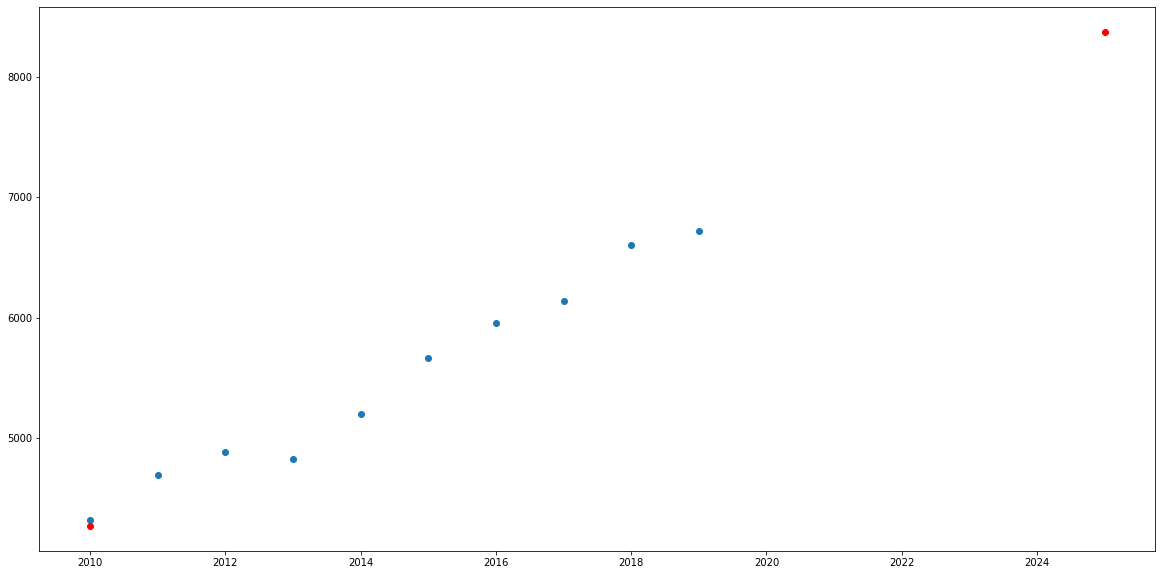

In [10]:
#prediz o número absoluto de matrículas por município em função do ano

estado = input("Digite a abreviação do estado: ") #Input para a abreviação do estado
municipio = input("Digite o nome do municipio: ") #Input para o nome do município
anoprev = input("Digite o ano para previsão:")
mostrar = input("Digite o que mostrar no gráfico (1-somente linha de previsão/2-somente ponto de previsão/3-linha e ponto): ") #Pede para o usuário se ele quer que a linha de regressão seja mostrada

codigomunicipio = 0 #Reseta o código do município

if (estado=="")or(municipio=="")or(anoprev=="")or(mostrar==""): #verifica as entradas
  print("Digite algo")
else:

  ano = int(anoprev) # converte para inteiro
  mostra = int(mostrar) # converte para inteiro

  if (ano < 2020): #Verifica se o ano é menor que 2020
    print("Ano inválido")

  else:

    if (mostra<1)or(mostra>3): #Valida o número
      print("Número inválido")
      
    else:

      for i in range(0,len(listaabrev)):                                    #
        if estado == listaabrev[i]:                                         #
          df_estado = df_nomes[df_nomes['abbrev_state']==estado]            #
          for i in range(0,len(listanomemuni)):                             # Pega o código do muinicípio a partir do que o usuário digitou
            if municipio == listanomemuni[i]:                               #
              df_municipio = df_estado[df_estado['name_muni']==municipio]   #
              codigomunicipio = int(df_municipio['code_muni'])              #


      rl = LinearRegression()#regressão linear

      fig=plt.figure(figsize=(20,10))#define o tamanho da figura

      listamuni = df['id_municipio'].unique().tolist() #pega a lista de municipios
      print("Digite algo")
      df_munic=df[df['id_municipio']==codigomunicipio] #pega o município

      anos = df_munic['ano'] #pega os anos do municipio

      numeroliquido =  df_munic['numero_absoluto_liquido_matricula_pre_escola'] #pega o numero de matriculas daquele municipio

      y = numeroliquido.values.flatten() #coloca numeroliquido na variável y e achata


      x = anos.values.reshape(-1,1) #coloca anos na variável x e redimensiona

      rl.fit(x,y) #faz o fit

      min=anos.min() #define minimo como o ano de inicio do dataframe
      max=ano #coloca o maximo


      x = [min,max]#Valor para a variável independente

      x_arr = np.array(x).reshape(-1,1) #prepara para o formato adequado

      y_pred  = rl.predict(x_arr) #calcula a predição

      print('Ano: ',x_arr.flatten())#imprime os anos minimo e maximo
      print('Número de matrículas: ', y_pred.flatten())#imporime os numeros de matriculas minimo e maximo

      plt.scatter(anos,numeroliquido) #imprime o gráfico 

      if (mostra!=""): #valida a entrada
        if (mostra == 1):
          plt.plot(x, y_pred, color='black') #imprime a predição com linha somente
        elif (mostra == 2):
          plt.scatter(x_arr, y_pred, color='red') #imprime a predição com ponto somente
        elif(mostra == 3):
          plt.scatter(x_arr, y_pred, color='red') #imprime a predição com linha e ponto
          plt.plot(x, y_pred, color='black')
      else:
        print("Digite um número para o indicador")

      print("Predição de matrículas no ano de ",ano," para o município de ", municipio,'(',estado,')') #Imprime o nome do município e o estado
      print("")

Digite a abreviação do estado: PR
Digite o nome do municipio: Cascavel
Digite o ano para previsão:2027
Digite o que mostrar no gráfico (1-somente linha de previsão/2-somente ponto de previsão/3-linha e ponto): 3
Digite algo
Ano:  [2010 2027]
Número de matrículas:  [4263.30909091 8927.6969697 ]
Predição de matrículas no ano de  2027  para o município de  Cascavel ( PR )



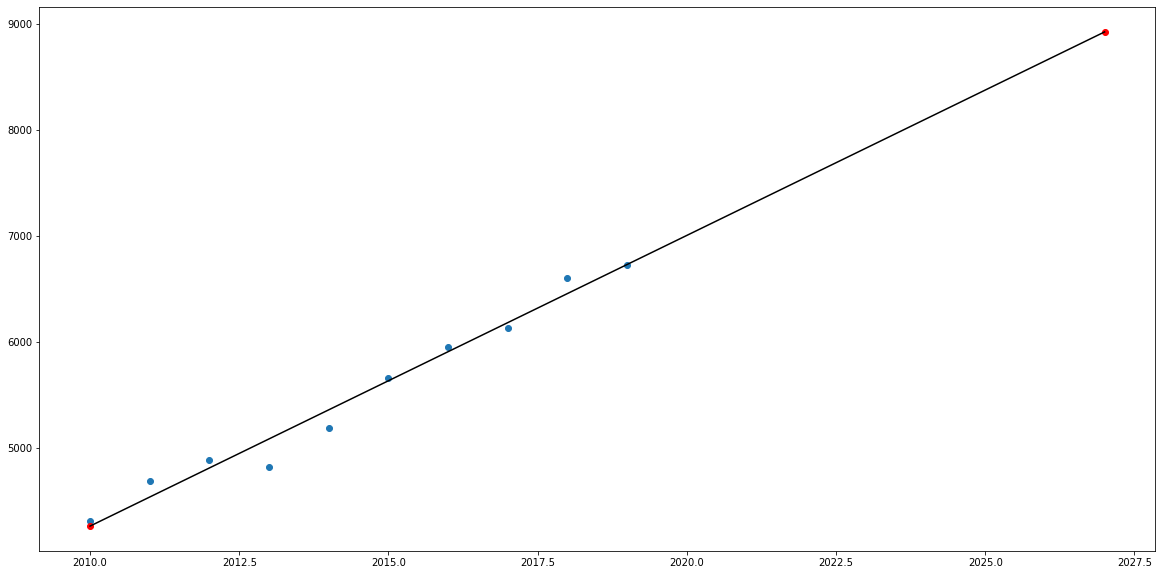

In [11]:
#prediz o número absoluto de matrículas por município em função do ano

estado = input("Digite a abreviação do estado: ") #Input para a abreviação do estado
municipio = input("Digite o nome do municipio: ") #Input para o nome do município
anoprev = input("Digite o ano para previsão:")
mostrar = input("Digite o que mostrar no gráfico (1-somente linha de previsão/2-somente ponto de previsão/3-linha e ponto): ") #Pede para o usuário se ele quer que a linha de regressão seja mostrada

codigomunicipio = 0 #Reseta o código do município

if (estado=="")or(municipio=="")or(anoprev=="")or(mostrar==""): #verifica as entradas
  print("Digite algo")
else:

  ano = int(anoprev) # converte para inteiro
  mostra = int(mostrar) # converte para inteiro

  if (ano < 2020): #Verifica se o ano é menor que 2020
    print("Ano inválido")

  else:

    if (mostra<1)or(mostra>3): #Valida o número
      print("Número inválido")
      
    else:

      for i in range(0,len(listaabrev)):                                    #
        if estado == listaabrev[i]:                                         #
          df_estado = df_nomes[df_nomes['abbrev_state']==estado]            #
          for i in range(0,len(listanomemuni)):                             # Pega o código do muinicípio a partir do que o usuário digitou
            if municipio == listanomemuni[i]:                               #
              df_municipio = df_estado[df_estado['name_muni']==municipio]   #
              codigomunicipio = int(df_municipio['code_muni'])              #


      rl = LinearRegression()#regressão linear

      fig=plt.figure(figsize=(20,10))#define o tamanho da figura

      listamuni = df['id_municipio'].unique().tolist() #pega a lista de municipios
      print("Digite algo")
      df_munic=df[df['id_municipio']==codigomunicipio] #pega o município

      anos = df_munic['ano'] #pega os anos do municipio

      numeroliquido =  df_munic['numero_absoluto_liquido_matricula_pre_escola'] #pega o numero de matriculas daquele municipio

      y = numeroliquido.values.flatten() #coloca numeroliquido na variável y e achata


      x = anos.values.reshape(-1,1) #coloca anos na variável x e redimensiona

      rl.fit(x,y) #faz o fit

      min=anos.min() #define minimo como o ano de inicio do dataframe
      max=ano #coloca o maximo


      x = [min,max]#Valor para a variável independente

      x_arr = np.array(x).reshape(-1,1) #prepara para o formato adequado

      y_pred  = rl.predict(x_arr) #calcula a predição

      print('Ano: ',x_arr.flatten())#imprime os anos minimo e maximo
      print('Número de matrículas: ', y_pred.flatten())#imporime os numeros de matriculas minimo e maximo

      plt.scatter(anos,numeroliquido) #imprime o gráfico 

      if (mostra!=""): #valida a entrada
        if (mostra == 1):
          plt.plot(x, y_pred, color='black') #imprime a predição com linha somente
        elif (mostra == 2):
          plt.scatter(x_arr, y_pred, color='red') #imprime a predição com ponto somente
        elif(mostra == 3):
          plt.scatter(x_arr, y_pred, color='red') #imprime a predição com linha e ponto
          plt.plot(x, y_pred, color='black')
      else:
        print("Digite um número para o indicador")

      print("Predição de matrículas no ano de ",ano," para o município de ", municipio,'(',estado,')') #Imprime o nome do município e o estado
      print("")

CONCLUSÃO:
De acordo com a base de dados, desde 2010 mais de 85% dos municípios brasileiros aumentaram o número de matrículas de crianças na pré-escola, indicando um aumento no índice de alfabetização em relação aquele ano. 
Além disso, a maioria das previsões foi de aumento no número de matrículas, o que denota que os índices de alfabetização tendem também a aumentar no futuro.